In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import re
import csv
import json
import pprint
pp = pprint.PrettyPrinter(indent=4)
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
filename = '/home/claire/Documents/jobs/milieu/milieu-noumea/noumea-analysis/python-noumea-sept13.csv'
df = pd.DataFrame.from_csv(filename, header=0, sep=',', index_col=0)
pd.options.display.max_columns = 999
df

,participant_id,email,age,enable_receive_emails,lives_in_noumea,months_lived_in_noumea,neighbourhood,question_body_q1-1,question_body_q1-10,question_body_q1-11,question_body_q1-2,question_body_q1-3,question_body_q1-4,question_body_q1-5,question_body_q1-6,question_body_q1-7,question_body_q1-8,question_body_q1-9,question_body_q2-1,question_body_q2-10,question_body_q2-11,question_body_q2-12,question_body_q2-13,question_body_q2-14,question_body_q2-2,question_body_q2-3,question_body_q2-4,question_body_q2-5,question_body_q2-6,question_body_q2-7,question_body_q2-8,question_body_q2-9,question_body_q3-1,question_body_q3-10,question_body_q3-2,question_body_q3-3,question_body_q3-4,question_body_q3-5,question_body_q3-6,question_body_q3-7,question_body_q3-8,question_body_q3-9,question_body_q4-1,question_body_q4-10,question_body_q4-11,question_body_q4-12,question_body_q4-13,question_body_q4-2,question_body_q4-3,question_body_q4-4,question_body_q4-5,question_body_q4-6,question_body_q4-7,question_body_q4-8,question_body_q4-9,question_body_q5-1,question_body_q5-2,question_body_q5-3,question_body_q5-4,question_body_q5-5,question_body_q5-6,question_body_q5-7,question_body_q5-8,question_body_q5-9,text_q1-1,text_q1-10,text_q1-11,text_q1-2,text_q1-3,text_q1-4,text_q1-5,text_q1-6,text_q1-7,text_q1-8,text_q1-9,text_q1-comment,text_q2-1,text_q2-10,text_q2-11,text_q2-12,text_q2-13,text_q2-14,text_q2-2,text_q2-3,text_q2-4,text_q2-5,text_q2-6,text_q2-7,text_q2-8,text_q2-9,text_q2-comment,text_q3-1,text_q3-10,text_q3-2,text_q3-3,text_q3-4,text_q3-5,text_q3-6,text_q3-7,text_q3-8,text_q3-9,text_q3-comment,text_q4-1,text_q4-10,text_q4-11,text_q4-12,text_q4-13,text_q4-2,text_q4-3,text_q4-4,text_q4-5,text_q4-6,text_q4-7,text_q4-8,text_q4-9,text_q4-comment,text_q5-1,text_q5-2,text_q5-3,text_q5-4,text_q5-5,text_q5-6,text_q5-7,text_q5-8,text_q5-9,text_q5-comment,watson_categories_q1-comment,watson_categories_q2-comment,watson_categories_q3-comment,watson_categories_q4-comment,watson_categories_q5-comment,watson_entities_q1-comment,watson_entities_q2-comment,watson_entities_q3-comment,watson_entities_q4-comment,watson_entities_q5-comment,watson_keywords_q1-comment,watson_keywords_q2-comment,watson_keywords_q3-comment,watson_keywords_q4-comment,watson_keywords_q5-comment,watson_score_q1-comment,watson_score_q2-comment,watson_score_q3-comment,watson_score_q4-comment,watson_score_q5-comment
3,29,jonathan.rebouillon@gmail.com,26.0,True,True,2 ans,Magenta,RDC espace public ouvert polyvalent (murs et c...,Bâtiments fermés au public pour réhabilitation,Maison du projet (accueil/ exposition),Bureaux co-working (bureaux partagés),Commerces,Espace à usage pluriel,Friche artistique-studios,Espace recherche scientifique,Café,Bureaux,Espaces verts et jardins potagers,Jardinières mobiles,Espace marchés éphémères (parvis + tables),Jardins potagers dans jardinières mobiles,Treillis avec hamacs,Mobilier urbain reconfigurable,Nouvelle station Néobus,Stands restauration rapide / stand glacier,Espace camionnettes restauration - Food truck,Aire de jeux pour enfants,Parasols géants,Espace skateboard,Mur végétal anti-bruit,Surfaces peintes toiles géantes pour artistes,Zones vertes créées par percement de l’asphalt...,Voie Express #1 déplacée,Parking en silo avec façades vertes,Voie Néobus retracée et réaménagée + Arrêts,Voie Karuia bus + Arrêts,Voie bus Raï + Gare Routière,Voie petit train,Voie cyclable + Vélib’,Voie piétonne,Connections piétonnes,Passerelle végétalisée,Parc botanique,Place publique avec jets d’eau,Espaces verts en cœur d’îlot,Littoral aménagé avec places publiques,Amphithéâtre flottant,"Zone village océanien (espace pédagogique, kio...","Zone culturelle (projection, auditorium, sculp...",Zone sport urbains (parc parkour et skateboard...,Jardins suspendus,Quais flottants avec jardins,Parc linéaire avec promenade,Piscine sur terrasse,Parvis du terminal croisiéristes,"Cité de la Création et de l'innovation (hôtel,...",Usage mixte: Bureaux + Logements,École de danse avec a

In [11]:
dfc = df[['watson_score_q1-comment', 'watson_score_q2-comment', 'watson_score_q3-comment', 'watson_score_q4-comment', 'watson_score_q5-comment']]
dfc2 = pd.DataFrame(dfc.mean()*100, columns=['mean'])
dfc.describe()

,watson_score_q1-comment,watson_score_q2-comment,watson_score_q3-comment,watson_score_q4-comment,watson_score_q5-comment
count,66.000000,61.000000,54.000000,45.000000,40.000000
mean,0.224817,0.158471,0.161590,0.233956,0.129102
std,0.372075,0.374387,0.333316,0.354479,0.346118
min,-0.576799,-0.774393,-0.654024,-0.342059,-0.586827
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.604078,0.452274,0.477231,0.553080,0.505230
max,0.950987,0.977417,0.891726,0.964816,0.780934


In [325]:
arr = []
df2 = df['watson_keywords_q1-comment'].dropna()
# df2 = [df2.replace({"'": '"'}, regex=True)]
df3 = pd.DataFrame(df2, columns=['keywords'])

In [326]:
import ast
d = []
pattern = re.compile(r'[A-Z]')
for index, row in df2.iteritems():
    x = row
    x = ast.literal_eval(x)
    if x != []:
        if not pattern.match(x[0]['text'][1]):
            text = x[0]['text'][0].lower() + x[0]['text'][1:]
        else:
            text = x[0]['text']
        relevance = x[0]['relevance']
        d.append({'index': index, 'text': text, 'relevance': relevance})
#         print(index, x[0]['text'], x[0]['relevance'])
keywords_df = pd.DataFrame(d)
keywords_df.set_index(['index'])

,relevance,text
index,,
10,0.977061,d'espaces jeunesses
12,0.964844,espaces verts
19,0.986366,l'ancien hopital
58,0.908229,artistiques= future zone
64,0.978817,nouveaux occupants
66,0.962914,nouvelles activités proposées
67,0.952496,dégradation continu
70,0.905610,un parc
74,0.962806,développement d'espaces artistiques


In [327]:
keywords_df = keywords_df.sort_values(['relevance', 'text'], ascending=[0, 0])
top_ten = keywords_df.head(10)
top_ten

,index,relevance,text
50,320,0.994408,un projet ambitieux
20,133,0.993173,sorties scolaires
30,205,0.993084,c'est difficile
28,199,0.988916,plan plat
25,182,0.987639,le café
24,152,0.987237,phase temporaire
2,19,0.986366,l'ancien hopital
49,314,0.985708,participation citoyenne
19,132,0.983336,projet collaboratif
55,347,0.982700,bonne idée


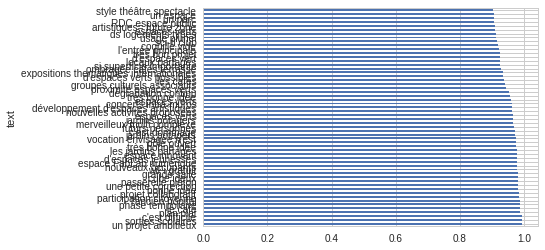

In [336]:
plt.style.use('seaborn-whitegrid')
plot = keywords_df.plot(y='relevance', x='text', kind='barh', legend=None)
plt.show()

In [ ]:
top_ten['relevance'] = top_ten['relevance'] ** 100
#     row['relevance'] = row['relevance'] ** 5
top_ten